# I. PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 testing samples.

## II. IMPORTING LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
type(train_images)

numpy.ndarray

In [4]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [5]:
train_images[0].shape

(28, 28)

## III. VISUALIZATION OF THE DATASET

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def get_class_name(image_class):
  return class_names[image_class]

In [7]:
def plot_image(image, cmap='gray'):
  plt.imshow(image, cmap=cmap)
  plt.axis('off')
  plt.show()

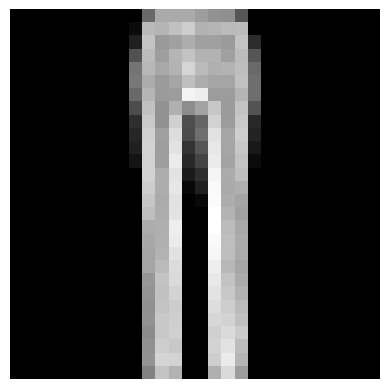

'Trouser'

In [8]:
plot_image(train_images[69])
get_class_name(train_labels[69])

In [9]:
train_images_flat = train_images.reshape(-1, 28 * 28).astype('float32') / 255.0
test_images_flat = test_images.reshape(-1, 28 * 28).astype('float32') / 255.0

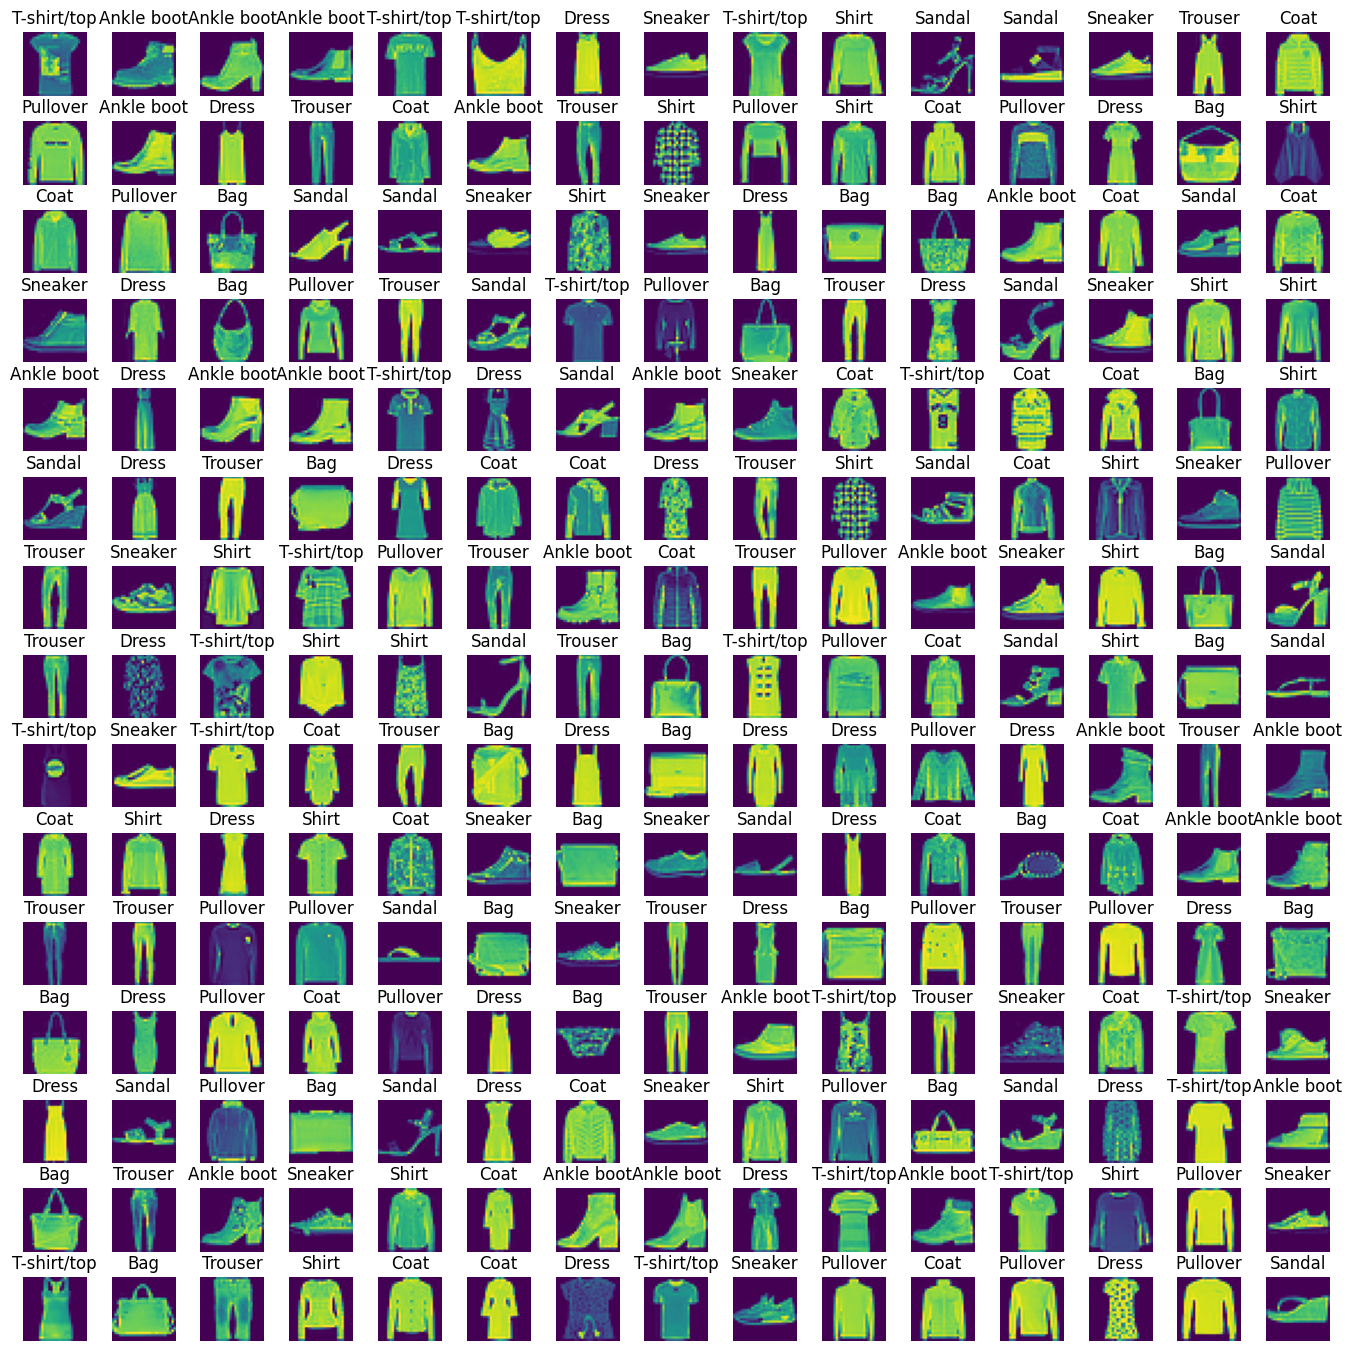

In [10]:
# Lets view more images in a grid format
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel() # Flatten

n_training = len(train_images)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(train_images[index])
  axes[i].set_title(get_class_name(train_labels[index]))
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## IV. TRANING THE MODEL

In [11]:
from tensorflow.keras.utils import to_categorical

train_images = train_images_flat / 255
train_labels = to_categorical(train_labels)
test_images = test_images_flat / 255
test_labels = to_categorical(test_labels)

In [12]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [13]:
X_train = train_images.reshape(48000, 28, 28, 1)
X_val = val_images.reshape(12000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [15]:
cnn_model = Sequential()

In [16]:
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
cnn_model.fit(
    X_train,
    train_labels,
    batch_size=512,
    epochs=50,
    validation_data=(X_val, val_labels)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.2904 - loss: 2.0262 - val_accuracy: 0.6936 - val_loss: 0.8488
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7046 - loss: 0.7725 - val_accuracy: 0.7537 - val_loss: 0.6659
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7568 - loss: 0.6459 - val_accuracy: 0.7803 - val_loss: 0.5959
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7856 - loss: 0.5787 - val_accuracy: 0.7943 - val_loss: 0.5643
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8002 - loss: 0.5481 - val_accuracy: 0.8070 - val_loss: 0.5336
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8100 - loss: 0.5179 - val_accuracy: 0.8192 - val_loss: 0.5099
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8217 - loss: 0.4922 - val_accuracy: 0.8248 - val_loss: 0.4928
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8281 - loss: 0.4820 - val_accuracy: 0.8150 - val_loss

## V. EVALUATING THE MODEL

In [18]:
evaluation = cnn_model.evaluate(X_test, test_labels)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8634 - loss: 0.3895
Test Accuracy: 0.8628000020980835


In [23]:
pred_classes = cnn_model.predict(X_test)
print(np.argmax(pred_classes[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
9


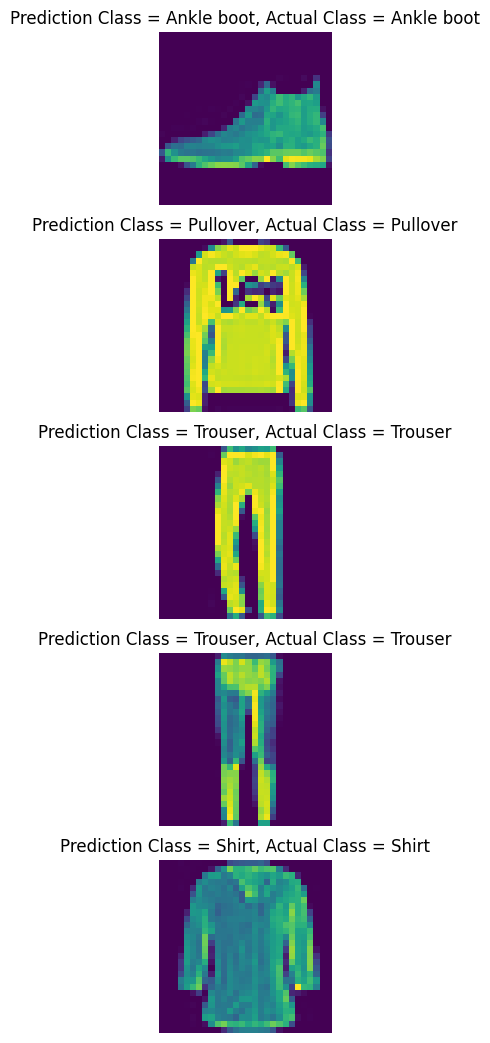

In [36]:
fig, ax = plt.subplots(5, 1, figsize = (10,13))
ax = ax.ravel()

for i in np.arange(0, 5):
  ax[i].imshow(X_test[i].reshape(28, 28))
  ax[i].set_title("Prediction Class = {}, Actual Class = {}".format(get_class_name(np.argmax(pred_classes[i])), get_class_name(np.argmax(test_labels[i]))))
  ax[i].axis('off')
  plt.subplots_adjust(wspace=0.5)
plt.show()

In [40]:
# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(pred_classes, axis=1)

# Create a boolean mask for incorrect predictions
incorrect_mask = y_pred_classes != np.argmax(test_labels)

# Get indices of incorrect predictions
incorrect_indices = np.where(incorrect_mask)[0]

In [50]:
print(f'Incorrect predictions: ', len(incorrect_indices))

Incorrect predictions:  9006


In [49]:
for i in incorrect_indices[:10]:
    print(f"Index: {i}, Predicted: {y_pred_classes[i]}, Actual: {np.argmax(test_labels[i])}")

Index: 1, Predicted: 2, Actual: 2
Index: 2, Predicted: 1, Actual: 1
Index: 3, Predicted: 1, Actual: 1
Index: 4, Predicted: 6, Actual: 6
Index: 5, Predicted: 1, Actual: 1
Index: 6, Predicted: 4, Actual: 4
Index: 7, Predicted: 6, Actual: 6
Index: 8, Predicted: 5, Actual: 5
Index: 9, Predicted: 7, Actual: 7
Index: 10, Predicted: 4, Actual: 4


In [48]:
np.argmax(test_labels[2])

np.int64(1)

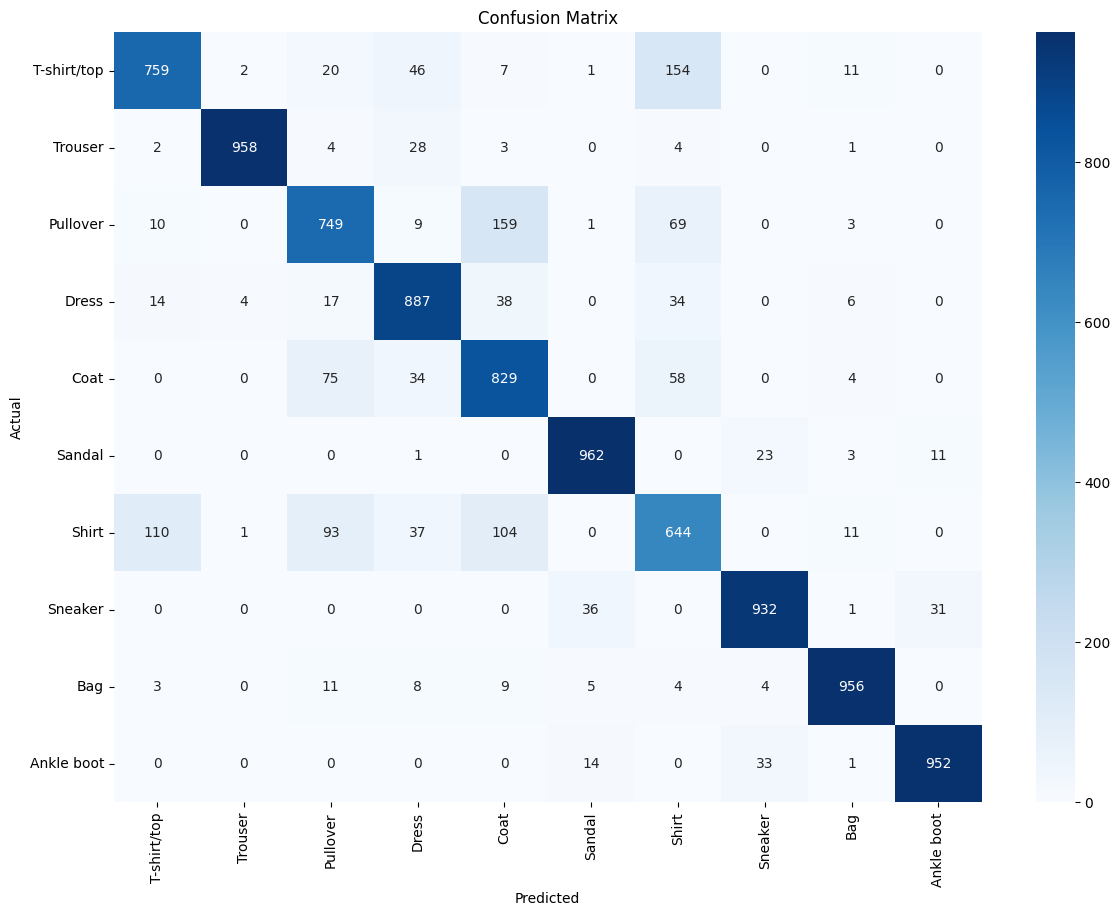

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')
plt.xticks(np.arange(10) + 0.5, class_names, rotation=90)
plt.yticks(np.arange(10) + 0.5, class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()